<h1 align="center"><font size="6">Predicting the Severity of Collisions in Seattle </font></h1>

<h1 align="center"><font size="3">Makanaka Nyamakura </font></h1>


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


# 1. Introduction and Business Problem

The problem that is at hand is the continuing increase in accidents in and around the city metropol area. These collisions will directly result in either an Injury or property damage. In the case of Injury collisions that would mean an increase in hospital admissions and because of  the limited capacity, trauma centres will now be overwhelmed. In the case of property damage it may result in the state being held liable even in the event of the motorists being in the wrong because of the lighting conditions of the streets which may be exsistent and malfunctioning and non-exisitent at all. The state could also be held accountable for not diplaying appropriate signage that gives warning of adverse road conditions. 


## 1.1 Recommedation

With all the issues that I have addressed I believe there should be urgency and a need to prevent the severity of collisions in the city metropol so as to curb the financial and emototional implications it causes. So by being able to predict the severity of collisions firstly by locations that are deemed to be hotspots and prone to accidents and then looking at other factors that may have a high correletation with the severity of the collisions, would change the outlook on the severity in the different locations. This analysis would have a high probability in reducing the number of collisions and the impact they have in the city metropol in the future. 

## 2.1 Data Source

The data source I am going to be using for this analysis is available [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) under the cloud object storage for the cognitive class course data.

## 2.2 Data Set

<b>SEVERITYCODE</b>  :  outlines level of severity

<b>X</b>             :      longitude cordinates

<b>Y</b>              :      latitude cordinates

<b>OBJECTID</b>       :      unlabelled data (could be dataset id)

<b>INCKEY</b>         :      unlabelled data

<b>COLDETKEY</b>      :      unlabelled data

<b>REPORTNO</b>       :      incident number

<b>STATUS</b>         :      labelled data with no reference to meaning

<b>ADDRTYPE</b>       :      type of road junction 

<b>INTKEY</b>         :      unlabelled data

<b>LOCATION</b>       :      physical address of incident

<b>EXCEPTRSNCODE</b>    :     Information code

<b>EXCEPTRSNDESC</b>    :     explanation of Information code

<b>SEVERITYCODE.1</b>   :     repeated field

<b>SEVERITYDESC</b>     :     explanation of the severity code

<b>COLLISIONTYPE</b>    :     type of collision (repeated)

<b>PERSONCOUNT</b>      :     the total number of people involved in the collision

<b>PEDCOUNT</b>         :     pedestrians invloved from the personcount

<b>PEDCYLCOUNT</b>      :     cyclists involved from the pedcount

<b>VEHCOUNT</b>         :     total number of vehicles involved

<b>INCDATE</b>          :     date of incident

<b>INCDTTM</b>          :     date time of incident

<b>JUNCTIONTYPE</b>     :     type of junction (repeated)

<b>SDOT_COLCODE</b>     :     type of collision code

<b>SDOT_COLDESC</b>     :     explanation of SDOT_COLCODE

<b>INATTENTIONIND</b>   :     unlabelled data

<b>UNDERINFL</b>        :      under influence (scrambled data)

<b>WEATHER</b>          :      weather at the day of the collission

<b>ROADCOND</b>         :      the condition of the road on the day of the collision

<b>LIGHTCOND</b>        :      the lighting condition on the day of the collision

<b>PEDROWNOTGRNT</b>    :      unlabelled data

<b>SDOTCOLNUM</b>       :      unlabelled data

<b>SPEEDING</b>         :      where the vehicles involved in the collision speeding (not enough data)

<b>ST_COLCODE</b>       :      type of collision code (repeated)

<b>ST_COLDESC</b>       :      explanation of ST_COLCODE (repeated)

<b>SEGLANEKEY</b>       :      unlabelled data

<b>CROSSWALKKEY</b>     :      unlabelled data

<b>HITPARKEDCAR</b>     :      flag for collision on parked cars

## 2.3 Data Cleaning

Repeated features highlighted above which are SEVERITYCODE.1, ST_COLCODE, ST_COLDESC  ,COLLISIONTYPE and JUNCTIONTYPE will be dropped from the feature set. Also all features with unlabelled data and all features that do not have enough information like OBJECTID, INCKEY, COLDETKEY, INTKEY, INATTENTIONIND, PEDROWNOTGRNT, SDOTCOLNUM, SEGLANEKEY, CROSSWALKKEY and SPEEDING will be dropped from the feature set. Features that are of no use in the analysis like REPORTNO, STATUS, EXCEPTRSNCODE, EXCEPTRSNDESC, PEDCOUNT, PEDCYLCOUNT, SDOT_COLCODE, SDOT_COLDESC.

## 2.4 Feature Selection

After Data cleaning the dataset is left with 194 673 samples and 15 features. For the categorical data to be used in the feature set I used the one hot encoding technique to convert categorical variables to binary variables and appended them to the feature set Data Frame. For each feature I looked at the different correlations of the feature to the depebdent variable in question, in this case Severity. For the weather feature I looked at the different weather condition distributions and removed the unknown and other category which could give a bias in the machine learning process (**Table1**). For the road condition feature I looked at the different road condition distributuions and removed the other and unknown category (**Table1**). For the lighting condition I follwed suit with the same process and removed the unknown and other categories (**Table1**). I dropped all 3 main column features from the feature set with the categorical variables now forming a basis for the feature set Data frame.
                                                                                                                                         
 
#### Table1. Feature Selection

| Kept features                                                                                                                  |Dropped features                                                     |  Reason for dropping features     |
| :---              |    :----:                                                                                                  |          ---:                                                       |
| Weather categorical variables (**Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing**)    | Unkown, Other categorical variables and the WEATHER column          |   Conversion of categorical variables                   |
| Road condition categorical variables (**Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet**)                                                                    | Unkown, Other categorical variables and the ROADCOND colum          |            Conversion of categorical variables          | 
| Light condition categorical variables (**Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk**)       | Unkown, Other categorical variables and the LIGHTCOND column         | Conversion of categorical variables                     | 

# 3. Methodology section

First we are going to read the data set with all the droppped columns. See the dataframe below.

In [4]:
Df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
Df.drop(['SEVERITYCODE.1', 'ST_COLCODE', 'ST_COLDESC'  ,'COLLISIONTYPE','JUNCTIONTYPE', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY','SPEEDING','REPORTNO', 'STATUS', 'EXCEPTRSNCODE','EXCEPTRSNDESC','PEDCOUNT','PEDCYLCOUNT', 'SDOT_COLCODE','SDOT_COLDESC'], axis=1, inplace=True)
Df.rename(columns={'ADDRTYPE':'JUNCTIONTYPE'}, inplace=True)
Df.head()

,SEVERITYCODE,X,Y,JUNCTIONTYPE,LOCATION,SEVERITYDESC,PERSONCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,2,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,2,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,3,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,2,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,N


I will now do a value count for the **UNDERINFL** feature to ascertain the the data type and categorical samples for the data.

In [5]:
Df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

I will then convert the categorical values of the **UNDERINFL** feature into numerical values and test the feature by doing a value count. See below

In [6]:
Df['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
Df['UNDERINFL'].value_counts()


0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64

I will mimic the same process for the **HITPARKEDCAR** feature so that I may have numerical data that I may use for analysis in the next section.

In [7]:
Df['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
Df['HITPARKEDCAR'].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

## 3.1  Exploratory Data Analysis


After the data cleaning and feature selection process I will look at  3 features which may give me a clearer picture in trying to reduce the severity of collisions. The first feature is **UNDERINFL** whic is defined in the Data section as a flag for under influence. The feature was scrambled with both categorical and numerical values with N having 100274 samples and 0  having 80394 samples whilst the other pairing of Y having 5126 samples and 1 having 3995 samples. After converting the categorical data to numerical values it is apparent that 95% of the collisions that occur in the city metropol are of individuals that are not under the influence. With the majority of that proportion resulting in a Property Damage Only Collision. See the figure below.

In [9]:
Df['INCDATE'] = pd.to_datetime(Df['INCDATE'])

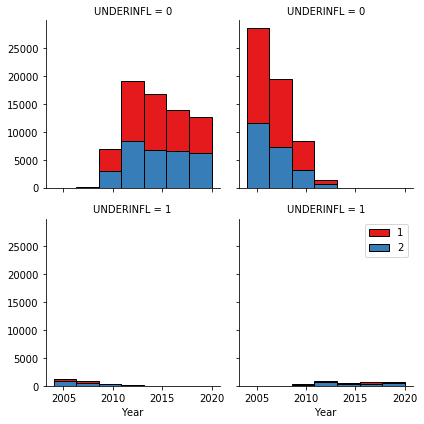

In [10]:
Df['Year'] = Df['INCDATE'].dt.year
bins = np.linspace(Df.Year.min(), Df.Year.max(), 8)
g = sns.FacetGrid(Df, col="UNDERINFL", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Year', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

The Second feature I am going to be exploring is the **HITPARKEDCAR** attribute which is decribed in the Data section as a flag for collision on parked cars. This feature is entirely a categorical variable with a Y samples of 7216 and N samples of 187457. I convert the values into numerical values of 1 for the Y samples and 0 for the N samples respectively. The representation of this data shows that 96% of the collisions that occur involve cars that are in motion with over 120000 of the samples resulting in Property Damage Only Collision. See figure below.

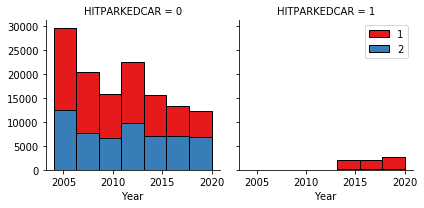

In [11]:
bins = np.linspace(Df.Year.min(), Df.Year.max(), 8)
g = sns.FacetGrid(Df, col="HITPARKEDCAR", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Year', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

The third feature I am going to be exploring is the **LOCATION** attribute which is defined in the Data section as the physical address of incident. I am going to look at the top 100 locations that had the most occurances of collision incidents in order of the highest and depict the datframe in a map visualization. First I am going to create a seperate dataframe with location information that is inclusive of the physical address and the cordinates. Then I create a **COUNT** attribute which looks at the number of occurances of the unique location and finish the data cleaning process by removing duplicate and missing values.

In [9]:
df1 = Df[['LOCATION','X','Y']]
df1['COUNT'] = df1.groupby('LOCATION')['LOCATION'].transform('count')
df1  =  df1.drop_duplicates() 
df1  = df1[df1['LOCATION'].notna()]
df1 = df1.dropna()
df1 = df1.sort_values('COUNT', ascending=False)
df1.reset_index(drop=True, inplace=True)
limit = 100
df1_incidents = df1.iloc[0:limit, :]
df1_incidents.head()

,LOCATION,X,Y,COUNT
0,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,-122.332653,47.708655,265.0
1,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,-122.344896,47.717173,254.0
2,6TH AVE AND JAMES ST,-122.328079,47.604161,252.0
3,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,-122.344997,47.725036,239.0
4,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,-122.299160,47.579673,231.0


After the creation of the location collision incidents dataframe we will now be able to plot data on a map to see the distribution of the collisions in Seattle.

In [14]:
latitude =  47.6062  
longitude = -122.3321

seattlemap = folium.Map(location=[latitude, longitude], zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df1_incidents.Y, df1_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattlemap.add_child(incidents)

In [15]:
Df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


## 3.2 Predictive Modelling

The Feature set that I am goin to be using to predict the severity of collisions will consist of the **WEATHER**, **ROADCOND** and the **LIGHTCOND** . These features are defined as the  weather at the day of the collission, the condition of the road on the day of the collision and the lighting condition on the day of the collision respectively. As I mentioned in the Data section that I will be using the one hot encoding technique to convert categorical variables to binary variables and append them to the feature set Data Frame. Lets start looking at the **WEATHER** feature and the correlations the feature has with the dependent variable **SEVERITYDESC**. It seems most of the information is highly useful except for the Other and Unknown weather conditions.

In [16]:
Df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
WEATHER                  SEVERITYDESC                                
Blowing Sand/Dirt        Property Damage Only Collision      0.732143
                         Injury Collision                    0.267857
Clear                    Property Damage Only Collision      0.677509
                         Injury Collision                    0.322491
Fog/Smog/Smoke           Property Damage Only Collision      0.671353
                         Injury Collision                    0.328647
Other                    Property Damage Only Collision      0.860577
                         Injury Collision                    0.139423
Overcast                 Property Damage Only Collision      0.684456
                         Injury Collision                    0.315544
Partly Cloudy            Injury Collision                    0.600000
                         Property Damage Only Collision      0.400000
Raining                  Property Damage Only Collision      0.662815
                         Injury Collision                    0.337185
Severe Crosswind         Property Damage Only Collision      0.720000
                         Injury Collision                    0.280000
Sleet/Hail/Freezing Rain Property Damage Only Collision      0.752212
                         Injury Collision                    0.247788
Snowing                  Property Damage Only Collision      0.811466
                         Injury Collision                    0.188534
Unknown                  Property Damage Only Collision      0.945928
                         Injury Collision                    0.054072

The second feature we are looking at in the feature set is the **ROADCOND** feature. As done in the previous process we will look at the correlations of this feature with the dependent variable.  It seems most of the information is highly useful and as the **WEATHER** feature except for the Other and Unknown road conditions. See table below.

In [17]:
Df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
ROADCOND       SEVERITYDESC                                
Dry            Property Damage Only Collision      0.678227
               Injury Collision                    0.321773
Ice            Property Damage Only Collision      0.774194
               Injury Collision                    0.225806
Oil            Property Damage Only Collision      0.625000
               Injury Collision                    0.375000
Other          Property Damage Only Collision      0.674242
               Injury Collision                    0.325758
Sand/Mud/Dirt  Property Damage Only Collision      0.693333
               Injury Collision                    0.306667
Snow/Slush     Property Damage Only Collision      0.833665
               Injury Collision                    0.166335
Standing Water Property Damage Only Collision      0.739130
               Injury Collision                    0.260870
Unknown        Property Damage Only Collision      0.950325
               Injury Collision                    0.049675
Wet            Property Damage Only Collision      0.668134
               Injury Collision                    0.331866

The last feature we are looking at in the feature set is the **LIGHTCOND** feature. As done in the previous processes we will look at the correlations of this feature with the dependent variable.  It seems most of the information is highly useful and as all previous features except for the Other and Unknown light conditions. See table below.

In [18]:
Df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
LIGHTCOND                SEVERITYDESC                                
Dark - No Street Lights  Property Damage Only Collision      0.782694
                         Injury Collision                    0.217306
Dark - Street Lights Off Property Damage Only Collision      0.736447
                         Injury Collision                    0.263553
Dark - Street Lights On  Property Damage Only Collision      0.701589
                         Injury Collision                    0.298411
Dark - Unknown Lighting  Property Damage Only Collision      0.636364
                         Injury Collision                    0.363636
Dawn                     Property Damage Only Collision      0.670663
                         Injury Collision                    0.329337
Daylight                 Property Damage Only Collision      0.668116
                         Injury Collision                    0.331884
Dusk                     Property Damage Only Collision      0.670620
                         Injury Collision                    0.329380
Other                    Property Damage Only Collision      0.778723
                         Injury Collision                    0.221277
Unknown                  Property Damage Only Collision      0.955095
                         Injury Collision                    0.044905

Now after looking at the correlations of the features that are going to be used in Predictive modelling, I am going to create the feature set of the independent variables (**X**).

In [19]:
Feature = Df[['WEATHER','ROADCOND','LIGHTCOND']]
Feature = pd.concat([Feature,pd.get_dummies(Df['WEATHER'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['WEATHER'], axis = 1,inplace=True)
Feature = pd.concat([Feature,pd.get_dummies(Df['ROADCOND'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['ROADCOND'], axis = 1,inplace=True)
Feature = pd.concat([Feature,pd.get_dummies(Df['LIGHTCOND'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)
X = Feature
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


After the assignemnet of the feature set I will assign the depend variables values to the values to be predicted (**y**).

In [20]:
y = Df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

## 3.2.1 Normalize Data

In this process I will normailze the feature set (**X**) in order to standardize the data for zero mean and unit variance. See below a snippet of the array of standardadized data.

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.01696304, -1.15340914, -0.05414257,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -1.33213439,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
         1.76085874, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.82233559, -0.17682024],
       [-0.01696304, -1.15340914, -0.05414257, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -1.33213439,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
         1.76085874, -0.08920831, -0.07872239,  1.73588509, -0.00751719,
        -0.1141037 , -1.21604855, -0.17682024],
       [-0.01696304, -1.15340914, -0.05414257,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713,  0.75067501,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
        -0.56790473, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.8223

## 3.2.2 Classification

In this process I would be using the Classification technique of modelling to train, test and build the model.
I will be using the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

I am going to be using a 80% - 20% train, test split respectively

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 23) (155738,)
Test set: (38935, 23) (38935,)


The first algorithim I will look at is  KNN where the data is trained with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66872993, 0.59101066, 0.67363555, 0.66323359, 0.69215359,
       0.67355849, 0.6891229 , 0.67622961, 0.69148581])

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6921535893155258 with k= 5


In [25]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The second algorithim I will look at is the Decision Tree which is one of the most popular machine learning algorithims that uses a  partitioning process creating  binary splits and continues until no further splits can be made.


In [26]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The third algorithim I will look at is Support Vector Machine (SVM) which works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [27]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
SVM_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

The last algorithim I will look at is Logistic Regression  which is used to solve classification problems, it is a predictive analysis algorithm and based on the concept of probability. Unlike  Linear Regression model the Logistic Regression algorithim uses a more complex cost function, this cost function can be defined as the Sigmoid function.

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 3.2.3 Model Evaluation using Test set (Imbalanced dataset)

In this section I am going to be looking at using the mentioned algorithims and evaluate the imbalanced dataset models using a test set.
This evaluation is going to measured using the jaccard_similarity_score, f1_score and log_loss.

In [4]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Now we are going to read the test dataframe that is going to be used for evaluating the models created.

In [5]:
Test_Df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
Test_Df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Here I will create the test features (**test_X**) that we will be using as a test set.

In [6]:
Test_Feature = Test_Df[['WEATHER','ROADCOND','LIGHTCOND']]
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(Test_Df['WEATHER'])], axis=1)
Test_Feature.drop(['Unknown'], axis = 1,inplace=True)
Test_Feature.drop(['Other'], axis = 1,inplace=True)
Test_Feature.drop(['WEATHER'], axis = 1,inplace=True)
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(Test_Df['ROADCOND'])], axis=1)
Test_Feature.drop(['Unknown'], axis = 1,inplace=True)
Test_Feature.drop(['Other'], axis = 1,inplace=True)
Test_Feature.drop(['ROADCOND'], axis = 1,inplace=True)
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(Test_Df['LIGHTCOND'])], axis=1)
Test_Feature.drop(['Unknown'], axis = 1,inplace=True)
Test_Feature.drop(['Other'], axis = 1,inplace=True)
Test_Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(Test_Feature).transform(Test_Feature)
test_X[0:5]

array([[-0.01696304, -1.15340914, -0.05414257,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -1.33213439,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
         1.76085874, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.82233559, -0.17682024],
       [-0.01696304, -1.15340914, -0.05414257, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -1.33213439,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
         1.76085874, -0.08920831, -0.07872239,  1.73588509, -0.00751719,
        -0.1141037 , -1.21604855, -0.17682024],
       [-0.01696304, -1.15340914, -0.05414257,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713,  0.75067501,
        -0.07905204, -0.01813462, -0.01963186, -0.07200071, -0.02431221,
        -0.56790473, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.8223

I will now create the dependent variable test set (**test_y**) that will be used as the test set predictor.

In [7]:
from sklearn import metrics
test_y = Test_Df['SEVERITYDESC'].values
test_y[0:5]



array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

Now I will evaluate the different models with the performance measures higlighted above. See Results below.

In [33]:
knn_yhat = kNN_model.predict(test_X)
knn_jaccard = "{:.2f}".format(jaccard_similarity_score(test_y, knn_yhat))
knn_f1_score = "{:.2f}".format(f1_score(test_y, knn_yhat, average='weighted'))

DT_yhat = DT_model.predict(test_X)
tree_jaccard =  "{:.2f}".format( jaccard_similarity_score(test_y, DT_yhat))
tree_f1_score = "{:.2f}".format( f1_score(test_y, DT_yhat, average='weighted') )

SVM_yhat = SVM_model.predict(test_X)
svm_jaccard = "{:.2f}".format(jaccard_similarity_score(test_y, SVM_yhat))
svm_f1_score = "{:.2f}".format( f1_score(test_y, SVM_yhat, average='weighted') )

LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
lr_jaccard = "{:.2f}".format( jaccard_similarity_score(test_y, LR_yhat))
lr_f1_score = "{:.2f}".format( f1_score(test_y, LR_yhat, average='weighted') )
lr_log_loss = "{:.2f}".format(log_loss(test_y, LR_yhat_prob))

Report = pd.DataFrame(data=np.array([
                                    ["KNN", knn_jaccard, knn_f1_score, np.nan],
                                    ["Decision Tree", tree_jaccard, tree_f1_score, np.nan],
                                    ["SVM", svm_jaccard, svm_f1_score, np.nan],
                                    ["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]
                                    ]), 
                                        columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])

Report = Report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
Report 

C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has bee

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.69,0.59,nan
Decision Tree,0.70,0.58,nan
SVM,0.70,0.58,nan
LogisticRegression,0.70,0.58,0.59


## 3.2.4 Model Accuracy (Balanced data set - Upsampling Minority Data Set)

In this section I am going to be looking at using the mentioned algorithims and evaluate the balanced dataset models through an upsampling technique using a test set.
This evaluation is going to measured using the jaccard_similarity_score, f1_score and log_loss.


Now we are going to read the dataframe that is going to be used to resample the dataset and for evaluating the models created.

In [8]:
Up_Df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
Up_Df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Here I will create the upsampled features (**Up_X**) that we will be used to train the balanced dataset model.

In [9]:
Up_Feature = Up_Df[['WEATHER','ROADCOND','LIGHTCOND','SEVERITYDESC']]
Up_Feature = pd.concat([Up_Feature,pd.get_dummies(Up_Df['WEATHER'])], axis=1)
Up_Feature.drop(['Unknown'], axis = 1,inplace=True)
Up_Feature.drop(['Other'], axis = 1,inplace=True)
Up_Feature.drop(['WEATHER'], axis = 1,inplace=True)
Up_Feature = pd.concat([Up_Feature,pd.get_dummies(Up_Df['ROADCOND'])], axis=1)
Up_Feature.drop(['Unknown'], axis = 1,inplace=True)
Up_Feature.drop(['Other'], axis = 1,inplace=True)
Up_Feature.drop(['ROADCOND'], axis = 1,inplace=True)
Up_Feature = pd.concat([Up_Feature,pd.get_dummies(Up_Df['LIGHTCOND'])], axis=1)
Up_Feature.drop(['Unknown'], axis = 1,inplace=True)
Up_Feature.drop(['Other'], axis = 1,inplace=True)
Up_Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)

In [10]:
	
from sklearn.utils import resample

I resampled the minority dataset (**Injury Collision**) to match the majority dataset (**Property Damage Only Collision**) sample size 1362485.

In [11]:
# Separate majority and minority classes
Up_majority = Up_Feature[Up_Feature.SEVERITYDESC=='Property Damage Only Collision']
Up_minority = Up_Feature[Up_Feature.SEVERITYDESC=='Injury Collision']


# Upsample minority class
df_minority_upsampled = resample(Up_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([Up_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.SEVERITYDESC.value_counts()

Injury Collision                  136485
Property Damage Only Collision    136485
Name: SEVERITYDESC, dtype: int64

In [12]:
Up_y = df_upsampled.SEVERITYDESC
Up_X = df_upsampled.drop('SEVERITYDESC', axis=1)

I am going to be using a 80% - 20% train, test split respectively on the upsampled data set and I will repeat the steps taken to create the models in **3.2.2**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Up_X, Up_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (218376, 23) (218376,)
Test set: (54594, 23) (54594,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51434224, 0.55500604, 0.52177895, 0.55647141, 0.52060666,
       0.52115617, 0.52179727, 0.52674287, 0.52238341])

In [15]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.556471407114335 with k= 4


In [16]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
kNN_model_up = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model_up

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_model_up = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model_up.fit(X_train,y_train)
DT_model_up

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
from sklearn import svm
SVM_model_up = svm.SVC()
SVM_model_up.fit(X_train, y_train) 
SVM_model_up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn.linear_model import LogisticRegression
LR_model_up = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model_up

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now I will evaluate the different models with the performance measures higlighted above. See Results below.

In [20]:
knn_yhat = kNN_model_up.predict(test_X)
knn_jaccard_up  = "{:.2f}".format(jaccard_similarity_score(test_y, knn_yhat))
knn_f1_score_up = "{:.2f}".format(f1_score(test_y, knn_yhat, average='weighted'))

DT_yhat = DT_model_up.predict(test_X)
tree_jaccard_up =  "{:.2f}".format( jaccard_similarity_score(test_y, DT_yhat))
tree_f1_score_up = "{:.2f}".format( f1_score(test_y, DT_yhat, average='weighted') )

SVM_yhat = SVM_model_up.predict(test_X)
svm_jaccard_up = "{:.2f}".format(jaccard_similarity_score(test_y, SVM_yhat))
svm_f1_score_up = "{:.2f}".format( f1_score(test_y, SVM_yhat, average='weighted') )

LR_yhat = LR_model_up.predict(test_X)
LR_yhat_prob = LR_model_up.predict_proba(test_X)
lr_jaccard_up = "{:.2f}".format( jaccard_similarity_score(test_y, LR_yhat))
lr_f1_score_up = "{:.2f}".format( f1_score(test_y, LR_yhat, average='weighted') )
lr_log_loss_up = "{:.2f}".format(log_loss(test_y, LR_yhat_prob))

Report = pd.DataFrame(data=np.array([
                                    ["KNN", knn_jaccard_up, knn_f1_score_up, np.nan],
                                    ["Decision Tree", tree_jaccard_up, tree_f1_score_up, np.nan],
                                    ["SVM", svm_jaccard_up, svm_f1_score_up, np.nan],   
                                    ["LogisticRegression", lr_jaccard_up, lr_f1_score_up, lr_log_loss_up]
                                    ]), 
                                        columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])

Report = Report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
Report 

C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has bee

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.40,0.35,nan
Decision Tree,0.48,0.48,nan
SVM,0.55,0.55,nan
LogisticRegression,0.68,0.60,0.67


## 3.2.5 Model Accuracy (Balanced data set - Downsampling Majority Data Set)

In this section I am going to be looking at using the mentioned algorithims and evaluate the balanced dataset models through an downsampling technique using a test set.
This evaluation is going to measured using the jaccard_similarity_score, f1_score and log_loss.


Now we are going to read the dataframe that is going to be used to resample the dataset and for evaluating the models created.

In [24]:
DS_Df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
DS_Df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Here I will create the downsampled features (**DS_X**) that we will be used to train the balanced dataset model.

In [25]:
DS_Feature = DS_Df[['WEATHER','ROADCOND','LIGHTCOND','SEVERITYDESC']]
DS_Feature = pd.concat([DS_Feature,pd.get_dummies(DS_Df['WEATHER'])], axis=1)
DS_Feature.drop(['Unknown'], axis = 1,inplace=True)
DS_Feature.drop(['Other'], axis = 1,inplace=True)
DS_Feature.drop(['WEATHER'], axis = 1,inplace=True)
DS_Feature = pd.concat([DS_Feature,pd.get_dummies(DS_Df['ROADCOND'])], axis=1)
DS_Feature.drop(['Unknown'], axis = 1,inplace=True)
DS_Feature.drop(['Other'], axis = 1,inplace=True)
DS_Feature.drop(['ROADCOND'], axis = 1,inplace=True)
DS_Feature = pd.concat([DS_Feature,pd.get_dummies(DS_Df['LIGHTCOND'])], axis=1)
DS_Feature.drop(['Unknown'], axis = 1,inplace=True)
DS_Feature.drop(['Other'], axis = 1,inplace=True)
DS_Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)

I am going to be using a 80% - 20% train, test split respectively on the downsampled data set and I will repeat the steps taken to create the models in **3.2.2**

In [26]:
# Separate majority and minority classes
DS_majority = DS_Feature[DS_Feature.SEVERITYDESC=='Property Damage Only Collision']
DS_minority = DS_Feature[DS_Feature.SEVERITYDESC=='Injury Collision']


# Downsample majority class
df_majority_downsampled = resample(DS_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=58188,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, DS_minority])
 
# Display new class counts
df_downsampled.SEVERITYDESC.value_counts()

Injury Collision                  58188
Property Damage Only Collision    58188
Name: SEVERITYDESC, dtype: int64

In [27]:
DS_y = df_downsampled.SEVERITYDESC
DS_X = df_downsampled.drop('SEVERITYDESC', axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DS_X, DS_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 23) (93100,)
Test set: (23276, 23) (23276,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.50021481, 0.46777797, 0.50683107, 0.5532308 , 0.55030933,
       0.54927823, 0.50996735, 0.55091081, 0.54317752])

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.553230795669359 with k= 4


In [31]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
kNN_model_ds = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model_ds

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_model_ds = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model_ds.fit(X_train,y_train)
DT_model_ds

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
from sklearn import svm
SVM_model_ds = svm.SVC()
SVM_model_ds.fit(X_train, y_train) 
SVM_model_ds

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
from sklearn.linear_model import LogisticRegression
LR_model_ds = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model_ds

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now I will evaluate the different models with the performance measures higlighted above. See Results below.

In [35]:
knn_yhat = kNN_model_ds.predict(test_X)
knn_jaccard_ds  = "{:.2f}".format(jaccard_similarity_score(test_y, knn_yhat))
knn_f1_score_ds = "{:.2f}".format(f1_score(test_y, knn_yhat, average='weighted'))

DT_yhat = DT_model_ds.predict(test_X)
tree_jaccard_ds =  "{:.2f}".format( jaccard_similarity_score(test_y, DT_yhat))
tree_f1_score_ds = "{:.2f}".format( f1_score(test_y, DT_yhat, average='weighted') )

SVM_yhat = SVM_model_ds.predict(test_X)
svm_jaccard_ds = "{:.2f}".format(jaccard_similarity_score(test_y, SVM_yhat))
svm_f1_score_ds = "{:.2f}".format( f1_score(test_y, SVM_yhat, average='weighted') )

LR_yhat = LR_model_ds.predict(test_X)
LR_yhat_prob = LR_model_ds.predict_proba(test_X)
lr_jaccard_ds = "{:.2f}".format( jaccard_similarity_score(test_y, LR_yhat))
lr_f1_score_ds = "{:.2f}".format( f1_score(test_y, LR_yhat, average='weighted') )
lr_log_loss_ds = "{:.2f}".format(log_loss(test_y, LR_yhat_prob))

Report = pd.DataFrame(data=np.array([
                                    ["KNN", knn_jaccard_ds, knn_f1_score_ds, np.nan],
                                    ["Decision Tree", tree_jaccard_ds, tree_f1_score_ds, np.nan],
                                    ["SVM", svm_jaccard_ds, svm_f1_score_ds, np.nan],   
                                    ["LogisticRegression", lr_jaccard_ds, lr_f1_score_ds, lr_log_loss_ds]
                                    ]), 
                                        columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])

Report = Report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
Report 

C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\makanaka.nyamakura\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has bee

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.43,0.40,nan
Decision Tree,0.50,0.51,nan
SVM,0.51,0.53,nan
LogisticRegression,0.69,0.60,0.64


# 4. Results

in this section I will be reporting on the outcome of the Methodology section. We will start with the Exploratory data analysis features that have been used in this report which are **UNDERINFL** , **HITPARKEDCAR** and **LOCATION**. The data for the **UNDERINFL**  feature was scrambled with categorical and numerical  values so the dataframe and the bar charts depicted the seperation. The feature had N samples of 100274, 0 samples of 80394, Y samples of 5126 and 1 samples 3995. Although the representation of the data is seperated, the definitions of the (N,0) and (Y,1) are the same. In the case of the Y and N samples, the N samples have a majority of 95% whilst in the other case 0 samples have  the same majority of 95%. The year trend analysis for the (N,0) pairing shows that there is a downward trend in collisions  from 2005 - 2010 period then a light peak from 2010 - 2013 period then there is a continuos drop from 2013 - 2020 period. For the minority class pairing (Y,1) it shows the same trend for the 2005 - 2010 period, the 2010 - 2013 period then from 2013 - 2016 period it drops and peaks slightly in 2016 and remains constant until 2020. The second feature **HITPARKEDCAR** is a much more straightforward categorical variable which I converted into a numerical values of 187457 samples of 0 and 7216 samples of 1. The 0 sample year trend analysis shows that there is a downward trend in collisions  from 2005 - 2010 period then a light peak from 2011 - 2013 period then there is a continuos drop from 2013 - 2020 period. The 1 sample year trend analysis shows that collisions started from 2013 and remained constant until 2017 and increased in 2017 and remained constant until 2020. The third feature I looked at is **LOCATION** and the impact of the top 100 collision incidents in the city. The location with the most collision incidents was N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N with 265 incidents. In the Predictive modelling section I used 4 algorithims on the imbalanced dataset and balanced data set and evaluated the models with a test set. For the imbalanced dataset the algorithims scored **69%** for KNN, **70%** for Decision Tree, **70%**  for SVM and **70%** for LogisticRegression. For the balanced data sets I used 2 approaches, upsampling the minority class and downsampling the majority class. For the upsampling approach the models scored **40%** for KNN, **48%** for the Decision Tree, **55%** for SVM	and **68%** for LogisticRegression. The downsampling approach for the models scored **43%** for KNN, **50%** for Decision Tree, **51%** for SVM	and **69%** for LogisticRegression.

# 5. Discussion

The outcomes from the Exploratory data analysis suggest that there is a strong correlation betweeen the yearly trend analysis for **UNDERINFL** 0 samples and the **HITPARKEDCAR** 0 samples which follow the same period patterns. The map visual representation of the **LOCAION** suggests that the majority of the collision incidents occur in the Central business district, University street, Belltown and along Ranier Ave South getting into the Central business district. This information suggests that there could be heavy traffic and congestion getting into and around the central business district which could also be supported by the trend of the **HITPARKEDCAR** 1 samples trend. The outcomes from the Predictive modelling suggest that the imbalanced data sets model accuracy for the Decision Tree, SVM and Logistic Regression models is desirable but because of the majority class (**Property Damage Only Collision**) all these models could create a bias. This is because the majority class constitutes **70%** of the data set and could skew model accuarcy towards biasness.The best models to implement are from the balanced data set test. The results from the downsampled data set evaluation suggest that the LogisticRegression model performs the best with the highest accuracy.

# 6. Conclusion

In conclusion, to reduce the number of collision incidents in and around the Central business district the state could impose more regulation and traffic police presence. Another option would be to impose a heavy fine for collisions that result in **Property Damage Only Collision**. The model accuracy for the LogisticRegression algorithim can be improved by adding more features that could have a higher correlation with the **SEVERITYDESC** feature. Other Tree based algorithims such as Random Forests and Gradient Boosted Trees could be used to try and predict the severity of the collisions . 